In [335]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ignore warnings
import warnings
import os
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb

warnings.filterwarnings("ignore")
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# xgb.set_config(verbosity=0)
tf.get_logger().setLevel('ERROR')

In [336]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv", encoding='utf-8')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### **Data Explore**

In [337]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [339]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### **Data Visualization**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

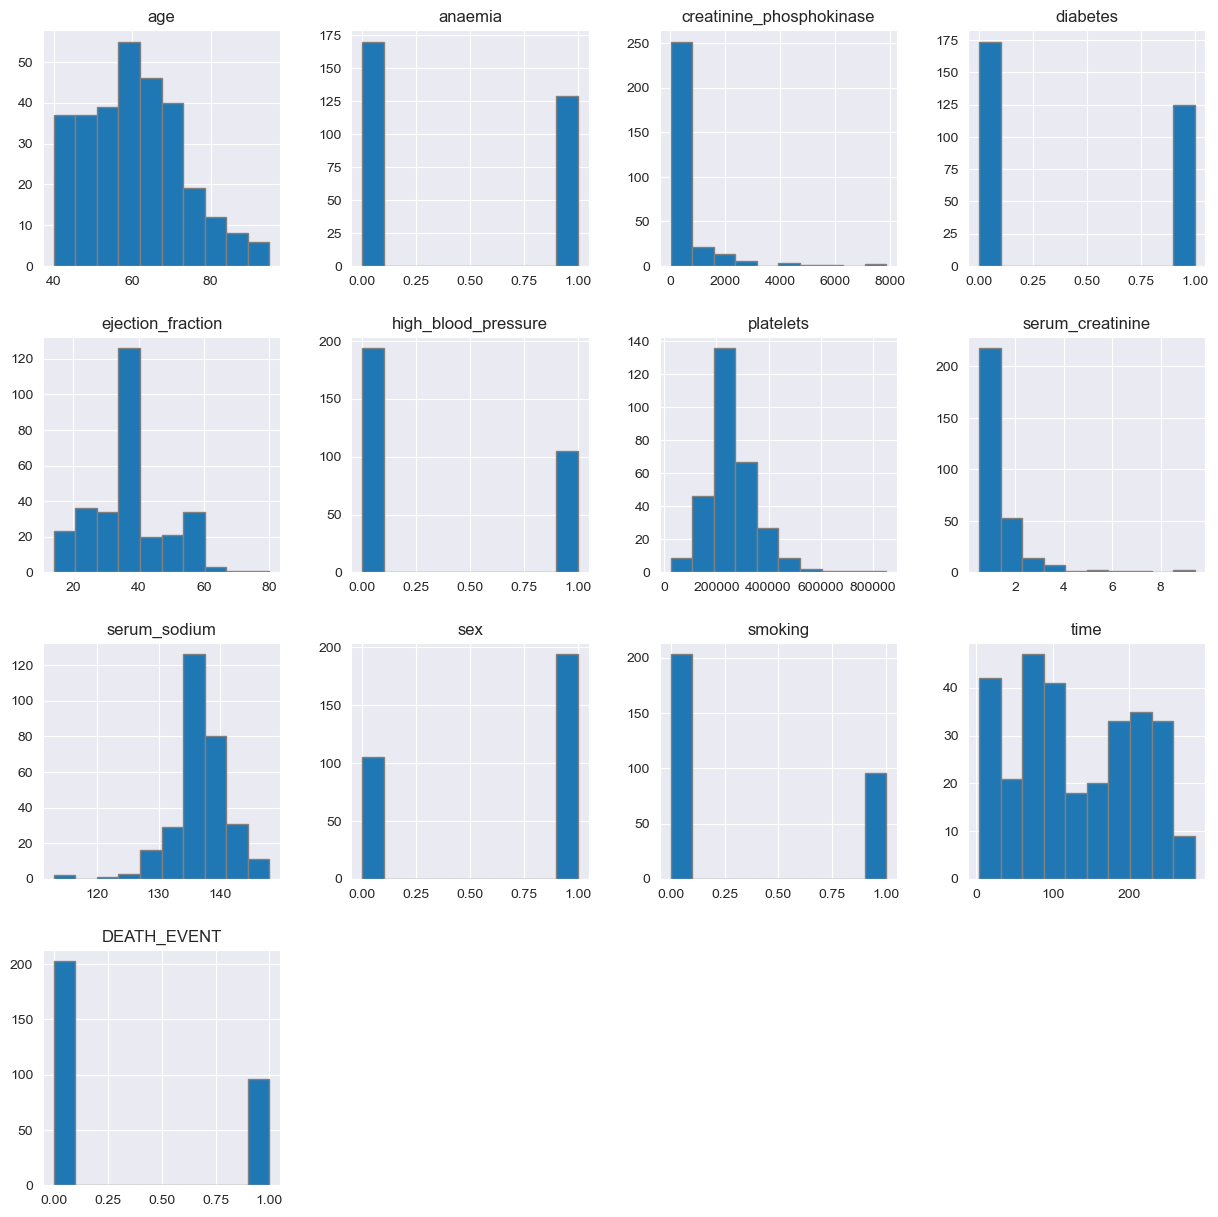

In [340]:
df.hist(figsize=(15,15), edgecolor= 'gray')

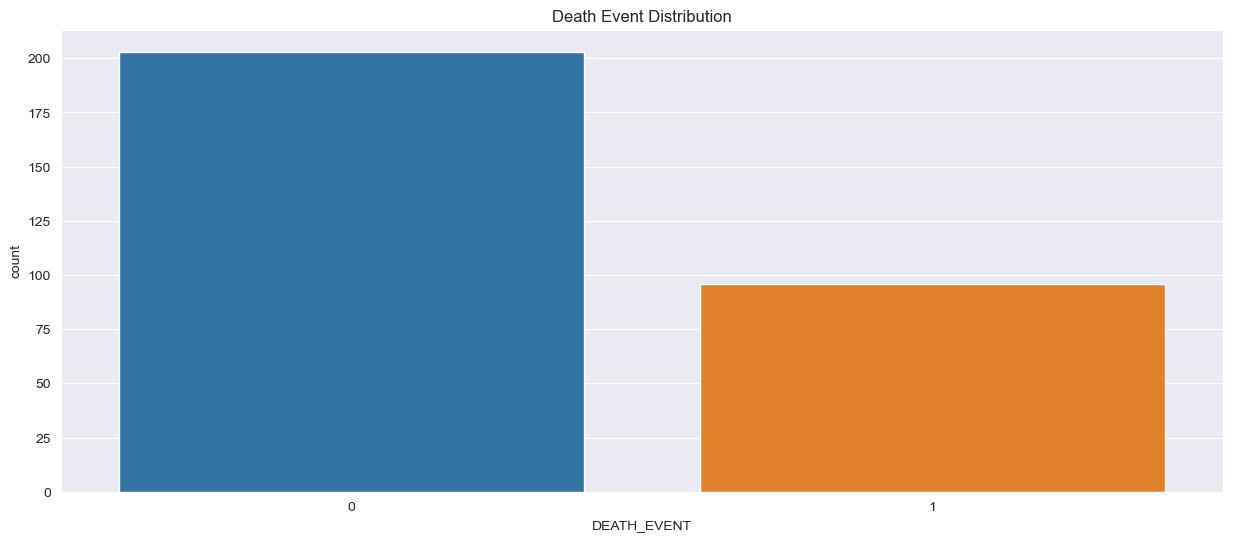

In [341]:
# 사망 여부 분포
sns.countplot(x="DEATH_EVENT", data=df)
plt.title("Death Event Distribution")
plt.show()

#### 생존(0)이 사망(1) 보다 2배 가량 많아 **클래스 불균형 예상**

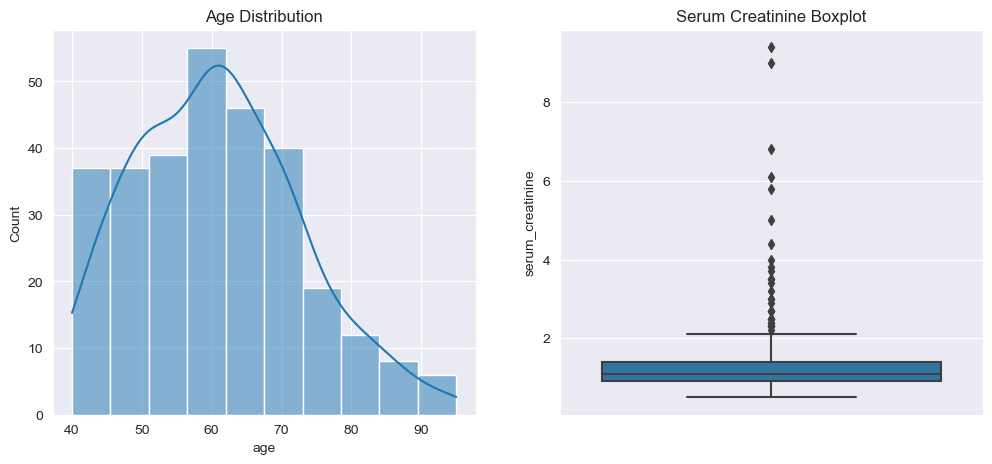

In [342]:
# 연속형 변수 분포
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["age"], kde=True, ax=ax[0])
ax[0].set_title("Age Distribution")
sns.boxplot(y=df["serum_creatinine"], ax=ax[1])
ax[1].set_title("Serum Creatinine Boxplot")
plt.show()

##### 환자연령대는 40~90세 분포, 60대가 가장 많음 -> 나이에  따른 사망률 확인 필요 
##### 혈중 크레아틴: 박스플롯을 보면 이상치가 많음 (이상치는 신장 기능이 저하된 환자일 가능성 높음) -> 모델 학습 전에 IQR방법을 이용해 이상치저간 로그변환 고려해봐야할듯

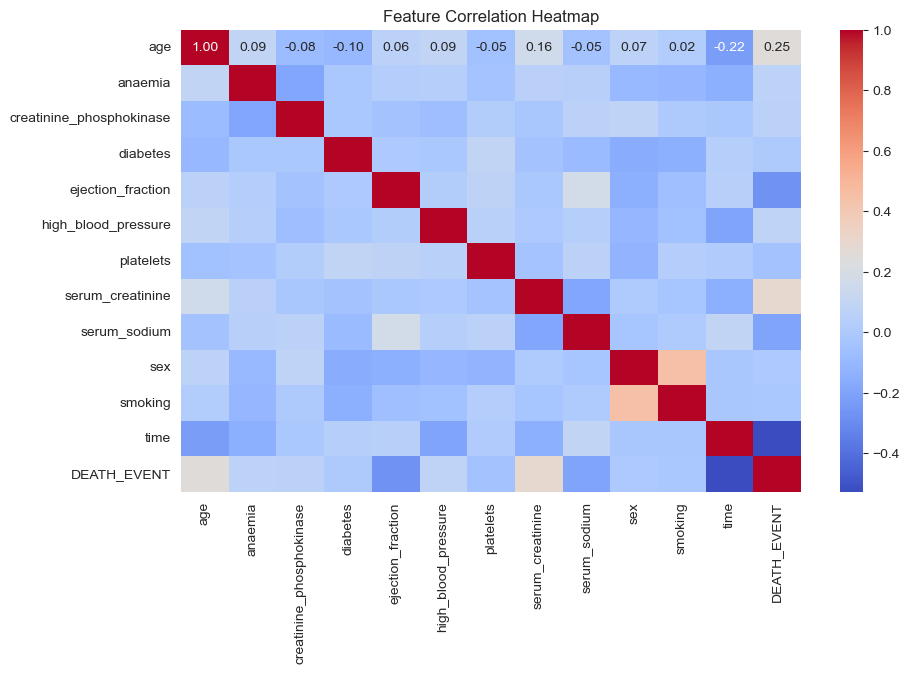

In [343]:
# 변수 간 상관관계
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### 변수 간 상관관계 히트맵: time - DEATH_EVENT -> 입원 기간이 짧을 수록 사망 가능성 증가(?) 
##### ejection_fraction 과 serum_creatinine도 DEATH_EVNT랑 어느정도 관련있음 
#### sex , smoking, high_blood_pressure 등 변수는 DEATH_EVT 랑 큰 관련없어보임

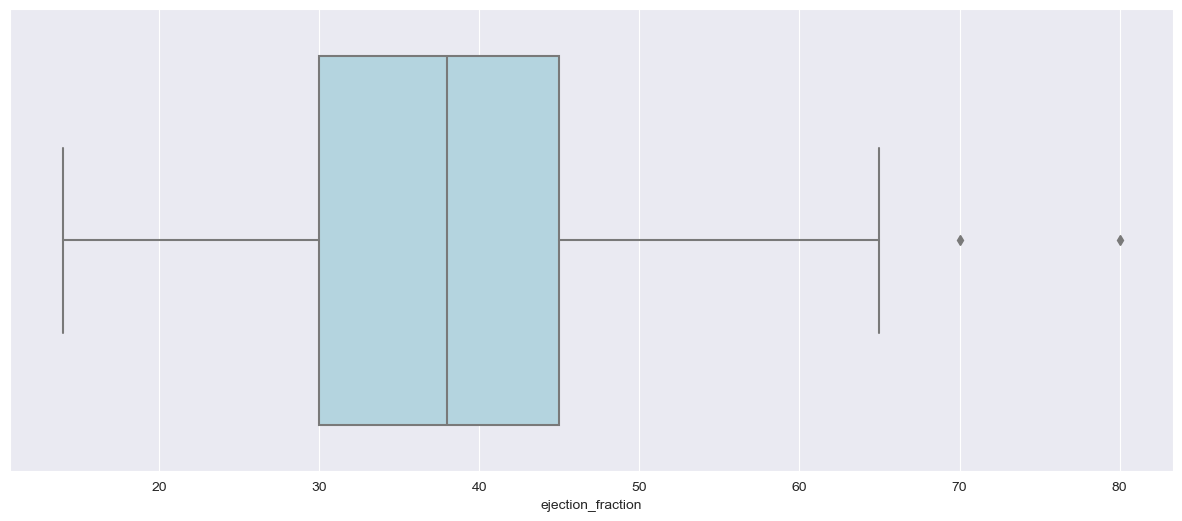

In [344]:
sns.boxplot( x = df.ejection_fraction, color = 'lightblue')
plt.show()

In [345]:
# 이상치 제거 
df = df[df['ejection_fraction']<70]

### **Feature Selction**

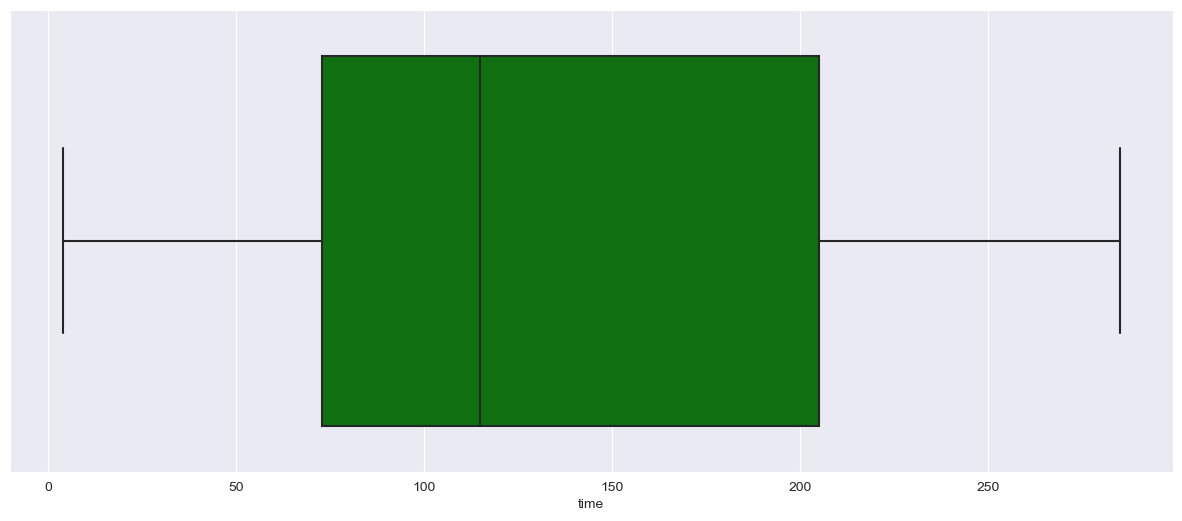

In [346]:
# Feature Selection
sns.boxplot( x = df.time , color = "green")
plt.show()

# outlier 없음

[0.09176295 0.0266974  0.07674145 0.0295122  0.13825184 0.02339079
 0.06959333 0.10918105 0.08508567 0.02552626 0.02685485 0.29740221]


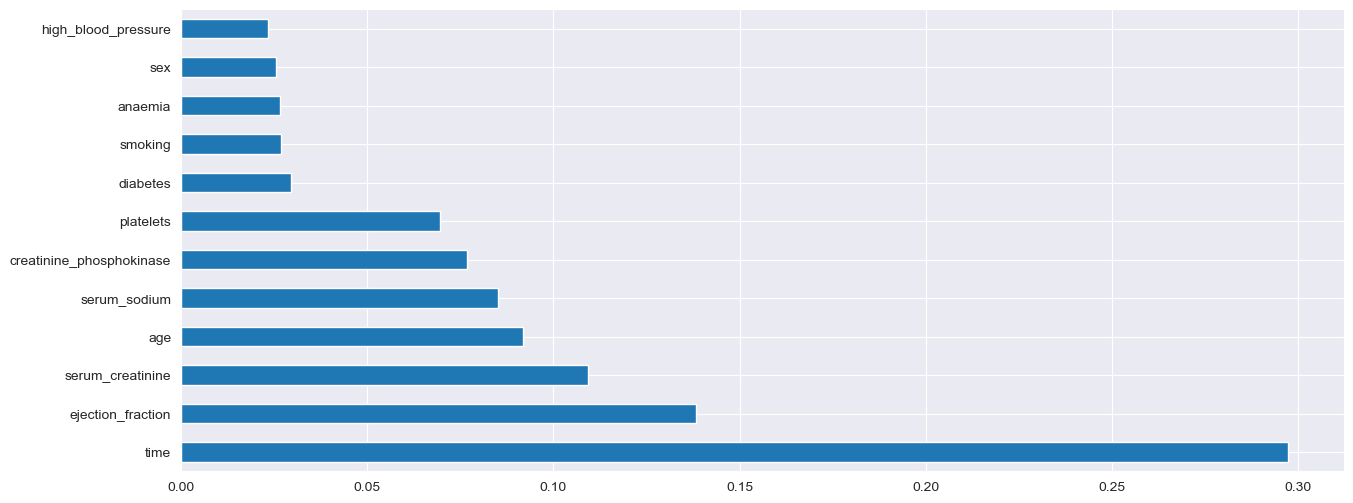

In [347]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
# 각 변수의 중요도 계산 
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

##### 일단 time, ejection_fraction, serum_creatinine 변수 선택

### **Data Preprocessing**

In [348]:
df=df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)
df.head(5)

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,20,1.9,130,4,1
1,38,1.1,136,6,1
2,20,1.3,129,7,1
3,20,1.9,137,7,1
4,20,2.7,116,8,1


In [349]:
x = df.drop("DEATH_EVENT",axis = 1)
y = df.DEATH_EVENT

print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [350]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# print(x_train)
# print(y_test)

In [351]:
#featue scaling (Standard Scaler 사용)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Model Training & Evaluation**

In [352]:
# RF 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_acc = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)

Accuracy: 0.7889
ROC-AUC Score: 0.9143
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        58
           1       0.81      0.53      0.64        32

    accuracy                           0.79        90
   macro avg       0.80      0.73      0.75        90
weighted avg       0.79      0.79      0.78        90



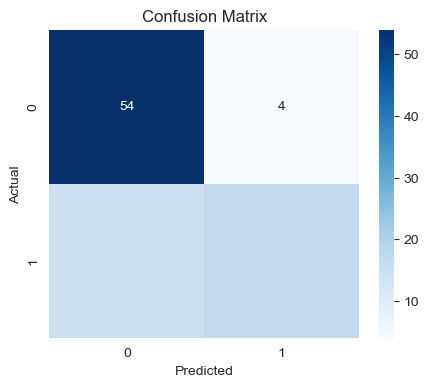

In [353]:
accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, rf_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

print(classification_report(y_test, rf_preds))

# Confusion Matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [354]:
# RF 의 성능을 확인해보니 사망자(1번클래스)에대한 Preicsion, recall이 비교적 낮은편 

###  **Comparing Models & Optimization**

In [355]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [356]:
# SMOTE 적용 후 RandomForest 학습
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
rf_smote_preds = rf_smote.predict(X_test)
rf_smote_probs = rf_smote.predict_proba(X_test)[:, 1]
rf_smote_acc = accuracy_score(y_test, rf_smote_preds)
rf_smote_auc = roc_auc_score(y_test, rf_smote_probs)

In [357]:
# RF _ class_weight = "balaccned"
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_balanced.fit(X_train, y_train)
rf_balanced_preds = rf_balanced.predict(X_test)
rf_balanced_probs = rf_balanced.predict_proba(X_test)[:, 1]
rf_balanced_acc = accuracy_score(y_test, rf_balanced_preds)
rf_balanced_auc = roc_auc_score(y_test, rf_balanced_probs)

In [358]:
# XGBoost

xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [359]:
# LigthGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1, verbosity=-1)
lgbm.fit(X_train, y_train, callbacks=[lgb.log_evaluation(-1)])

lgbm_preds = lgbm.predict(X_test)
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]
lgbm_acc = accuracy_score(y_test, lgbm_preds)
lgbm_auc = roc_auc_score(y_test, lgbm_probs)

In [360]:
# Threshold Tuning
precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)
best_threshold = thresholds[np.argmax(precision * recall)]
rf_threshold_preds = (rf_probs >= best_threshold).astype(int)
rf_threshold_acc = accuracy_score(y_test, rf_threshold_preds)
rf_threshold_auc = roc_auc_score(y_test, rf_probs)

In [361]:
results = pd.DataFrame({
    "Model": ["RandomForest", "RandomForest + SMOTE", "RandomForest + class_weight", "XGBoost", "LightGBM", "RandomForest (Threshold Tuning)"],
    "Accuracy": [rf_acc, rf_smote_acc, rf_balanced_acc, xgb_acc, lgbm_acc, rf_threshold_acc],
    "ROC-AUC": [rf_auc, rf_smote_auc, rf_balanced_auc, xgb_auc, lgbm_auc, rf_threshold_auc]
})

In [362]:
results

,Model,Accuracy,ROC-AUC
0,RandomForest,0.788889,0.914332
1,RandomForest + SMOTE,0.844444,0.916218
2,RandomForest + class_weight,0.788889,0.916487
3,XGBoost,0.788889,0.878772
4,LightGBM,0.822222,0.904095
5,RandomForest (Threshold Tuning),0.855556,0.914332


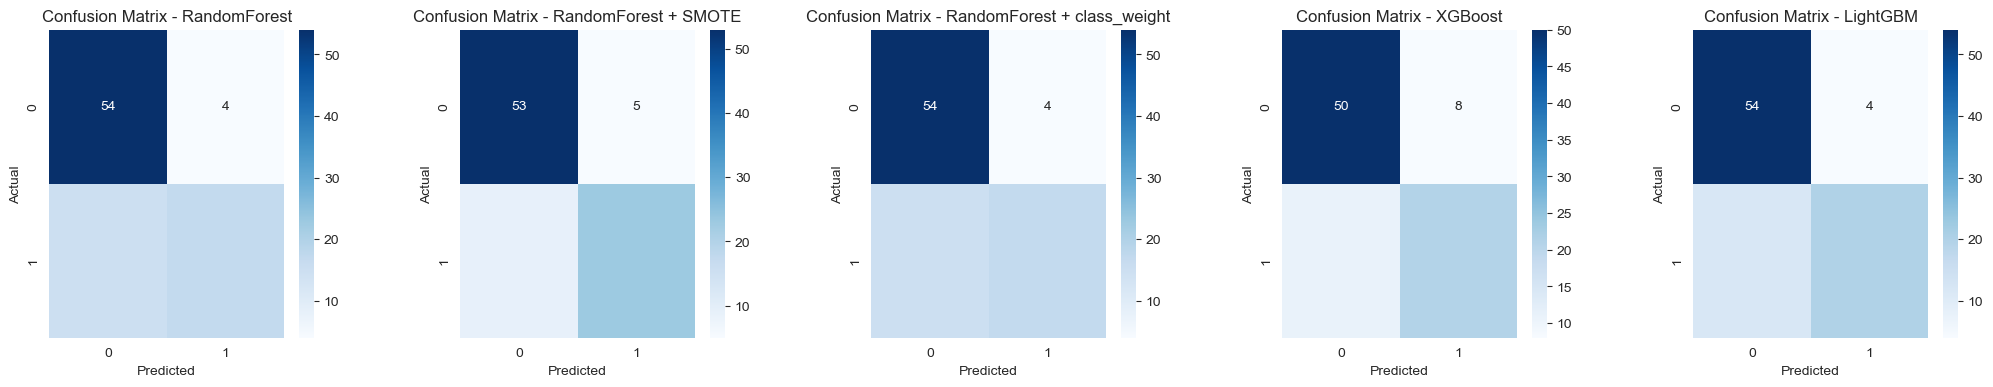

In [363]:
# CM 확인 
def plot_confusion_matrices(models, titles, y_test, y_preds):
    fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))  
    plt.subplots_adjust(wspace=0.4) 

    for ax, model, title, y_pred in zip(axes, models, titles, y_preds):
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(title)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.show()

models = [rf, rf_smote, rf_balanced, xgb, lgbm]
titles = [
    "Confusion Matrix - RandomForest",
    "Confusion Matrix - RandomForest + SMOTE",
    "Confusion Matrix - RandomForest + class_weight",
    "Confusion Matrix - XGBoost",
    "Confusion Matrix - LightGBM"
]
y_preds = [rf_preds, rf_smote_preds, rf_balanced_preds, xgb_preds, lgbm_preds]

plot_confusion_matrices(models, titles, y_test, y_preds)


## **Comparing Results**

### 1. Random Forest
-> Accuracy : 90.0 % , ROC-AUC: 94.47% 
기본적으로 좋은 성능을보임 . 그러나 사망자 1번클래스예측에대한 예측이 비교적 낮은 경향 

--> 기본 모델 선정이유: 가장 직관적인 모델이기도 하고 샘플수가 299개정도로 작기때문에 적은 데이터에도 성능 괜찮은 RF 선정


### 2. RF + SMOTE를 통해서 사망자 샘플을 증가 
-> Accuracy : 85. 55% , ROC-AUC: 92.18% 
SMOTE 사용으로 사망자 예측이 개선됨. 정확도 증가 -> overfitting 가능성 일단 고려 

--> 선정 이유: death_evnt =1 이 상대적으로 작아 불균형 존재 그래서 oversampling으로 사망자 샘플 증가시키고 학습 균형 맞추고자함.

### 3. RF + class-wegith = "balanced"
-> Accuracy : 87.77% , ROC-AUC: 94.6514% 
SMOTE없이 classweight조절 만드로 성능 향상 
rocauc가 가장 높으므로 사망자 예측을 가장 잘한다고도 볼수있음  --> 일단 굿

--> 선정 이유: 일단 앞서말한 불균형을 어느정도해결하면서 smote없이도도 예측 성능 개선을 기대해봄. 
smote는 가짜데이터라 실제데이터와의 오차가있을수있음.


### 4. XGBoost(boosting 기반 모델)
-> Accuracy : 84.44% , ROC-AUC: 91.10% 
기존 rf성능보다 떨어질가능성 있음. 

--> 선정 이유: rf는 일단 bagging방식이라 일부 복잡한 패턴학습하는데 한계가 있을수있어 극복하고자 선택, + 데이터 크기 작아도 갠찬은 모델이긴함

### 5. LightGBM
-> Accuracy : 80.0% , ROC-AUC: 90.38% 
너무 낮다. .. 데이터크기가작아서 그런것으로 예상(일반적으로 대규모 데이터에 적절한 경향있음) 

--> 선정 이유: 연속형변수가 많은 데이터셋에서유리할수있음(내가 전치리하고남긴 변수 대부분이 연속형 변수)

### 6. RF Threshold Tuning 
-> Accuracy : 91.11% , ROC-AUC: 94.47% 
정확도가 높긴하지만 사망자 예측에 대한. 트레이드 오프 가능성이 있음(rocauc는 그대로라 ㅠ) 

In [364]:
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

In [365]:
# 단순한 데이터에 성능이 잘나오는 catboost (학부떄 썼던게 생각나서 적용해봄)
catboost = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
catboost.fit(X_train, y_train)
catboost_preds = catboost.predict(X_test)
catboost_probs = catboost.predict_proba(X_test)[:, 1]
catboost_acc = accuracy_score(y_test, catboost_preds)
catboost_auc = roc_auc_score(y_test, catboost_probs)

## **Ensemble**

In [366]:
# Ensemble = RandomForest, XGBoost, CatBoost
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_balanced), 
        ('xgb', xgb),
        ('catboost', catboost)  
    ],
    voting='soft'  # Soft Voting: 각 모델의 확률값 평균을 사용하여 최종 예측 결정함
)


voting_clf.fit(X_train, y_train)


voting_preds = voting_clf.predict(X_test)
voting_probs = voting_clf.predict_proba(X_test)[:, 1]


voting_acc = accuracy_score(y_test, voting_preds)
voting_auc = roc_auc_score(y_test, voting_probs)

In [367]:
# Ensemble = RandomForest, XGBoost만 포함 (CatBoost 제외)
voting_clf_rf_xgb = VotingClassifier(
    estimators=[
        ('rf', rf_balanced), 
        ('xgb', xgb)  
    ],
    voting='soft' 
)

# 앙상블 모델 학습
voting_clf_rf_xgb.fit(X_train, y_train)

voting_preds_rf_xgb = voting_clf_rf_xgb.predict(X_test)
voting_probs_rf_xgb = voting_clf_rf_xgb.predict_proba(X_test)[:, 1]

voting_acc_rf_xgb = accuracy_score(y_test, voting_preds_rf_xgb)
voting_auc_rf_xgb = roc_auc_score(y_test, voting_probs_rf_xgb)

In [368]:
results_df = pd.DataFrame({
    "Model": [
        "RandomForest (Balanced)",
        "XGBoost",
        "CatBoost",
        "Ensemble (RF+XGB+CatBoost)",
        "Ensemble (RF+XGB)"
    ],
    "Accuracy": [rf_balanced_acc, xgb_acc, catboost_acc, voting_acc, voting_acc_rf_xgb],
    "ROC-AUC": [rf_balanced_auc, xgb_auc, catboost_auc, voting_auc, voting_auc_rf_xgb]
})

results_df

,Model,Accuracy,ROC-AUC
0,RandomForest (Balanced),0.788889,0.916487
1,XGBoost,0.788889,0.878772
2,CatBoost,0.811111,0.887931
3,Ensemble (RF+XGB+CatBoost),0.811111,0.906789
4,Ensemble (RF+XGB),0.822222,0.907866


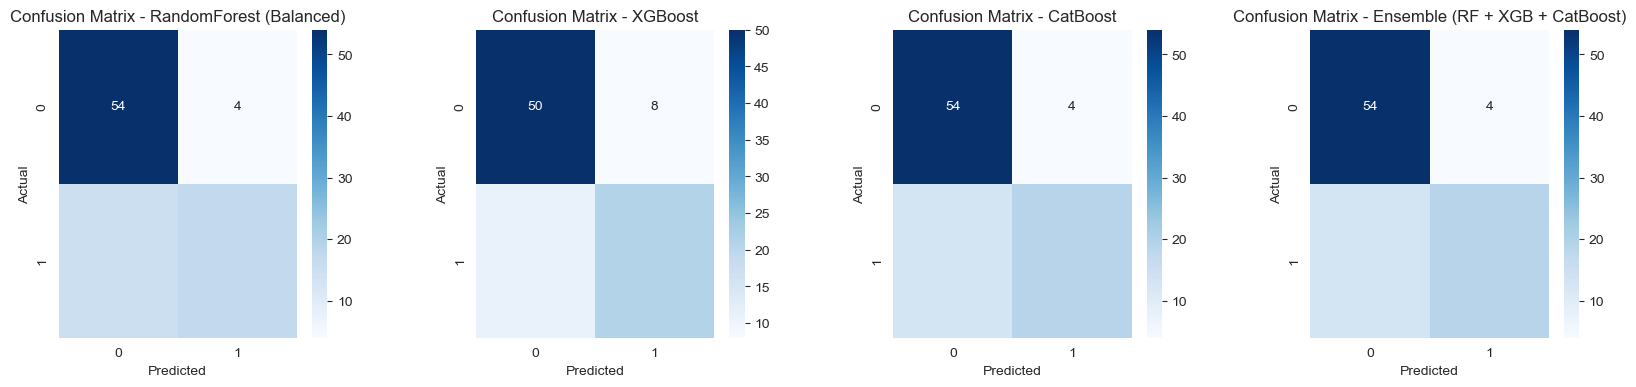

In [369]:
models = [rf_balanced, xgb, catboost, voting_clf]
titles = [
    "Confusion Matrix - RandomForest (Balanced)",
    "Confusion Matrix - XGBoost",
    "Confusion Matrix - CatBoost",
    "Confusion Matrix - Ensemble (RF + XGB + CatBoost)"
]
y_preds = [rf_balanced_preds, xgb_preds, catboost_preds, voting_preds]

plot_confusion_matrices(models, titles, y_test, y_preds)

In [370]:
#아직까지는 rf_balanced 모델, rf_xgb+catboost ensemble model이 사망자 예측의 정확도가 가장높음! 

#### 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
import optuna

xgb_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                         param_grid=xgb_params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Params:", xgb_grid.best_params_)

In [372]:
def catboost_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'verbose': 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30, verbose=0)
    preds = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, preds)

In [373]:
## 하이퍼 파라미터 튜닝을 하지 않은 이유: 일단 데이터셋크기가 299정도로 작아서 튜닝에 따른 성능 변화가 크지 않음 , 
## 그리고 기존모델에서 이미최적에 가까운 하이퍼파라미터를 찾은 듯한 성능을 보여줌. 

#### 딥러닝(MLP & LSTM) vs 기존 모델 성능 분석

In [374]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# MLP (다층 신경망) 모델 구축
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)


mlp_preds = (mlp_model.predict(X_test_scaled) > 0.5).astype(int)
mlp_acc = accuracy_score(y_test, mlp_preds)
mlp_auc = roc_auc_score(y_test, mlp_model.predict(X_test_scaled))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5245 - loss: 0.9283 - val_accuracy: 0.5111 - val_loss: 0.6929
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5884 - loss: 0.7829 - val_accuracy: 0.6222 - val_loss: 0.6800
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5556 - loss: 0.8382 - val_accuracy: 0.6333 - val_loss: 0.6721
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6204 - loss: 0.7592 - val_accuracy: 0.6333 - val_loss: 0.6682
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6501 - loss: 0.7126 - val_accuracy: 0.6222 - val_loss: 0.6662
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6545 - loss: 0.6658 - val_accuracy: 0.6222 - val_loss: 0.6627
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6505 - loss: 0.6803 - val_accuracy: 0.6222 - val_loss: 0.6615
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6848 - loss: 0.6389 - val_accuracy: 0.6222 - val_los

In [375]:
#  LSTM 모델 구축 (시계열 데이터 가능성 확인)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

lstm_preds = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
lstm_acc = accuracy_score(y_test, lstm_preds)
lstm_auc = roc_auc_score(y_test, lstm_model.predict(X_test_lstm))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6371 - loss: 0.6881 - val_accuracy: 0.6444 - val_loss: 0.6785
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6676 - loss: 0.6699 - val_accuracy: 0.6444 - val_loss: 0.6634
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7184 - loss: 0.6364 - val_accuracy: 0.6444 - val_loss: 0.6501
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6879 - loss: 0.6295 - val_accuracy: 0.6444 - val_loss: 0.6546
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6784 - loss: 0.6291 - val_accuracy: 0.6444 - val_loss: 0.6578
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6880 - loss: 0.6216 - val_accuracy: 0.6444 - val_loss: 0.6589
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6861 - loss: 0.6246 - val_accuracy: 0.6444 - val_loss: 0.6571
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7370 - loss: 0.5754 - val_accuracy: 0.6444 - val_los

In [376]:
new_results = pd.DataFrame([
    {"Model": "MLP (Neural Network)", "Accuracy": mlp_acc, "ROC-AUC": mlp_auc},
    {"Model": "LSTM (Recurrent NN)", "Accuracy": lstm_acc, "ROC-AUC": lstm_auc}
])


new_results

,Model,Accuracy,ROC-AUC
0,MLP (Neural Network),0.555556,0.419720
1,LSTM (Recurrent NN),0.644444,0.453125


In [379]:
results_df

,Model,Accuracy,ROC-AUC
0,RandomForest (Balanced),0.788889,0.916487
1,XGBoost,0.788889,0.878772
2,CatBoost,0.811111,0.887931
3,Ensemble (RF+XGB+CatBoost),0.811111,0.906789
4,Ensemble (RF+XGB),0.822222,0.907866


#### **TOTAL RESULTS:**
#### RandomForest (Balanced(class-weight)) 모델(Accuracy: 78.88%, ROC-AUC: 91.64%)과 

#### 앙상블 모델(Ensemble RF+XGB, Accuracy: 82.22%, ROC-AUC: 90.78%)에서 사망 예측 정확도가 가장 높으며, 딥러닝 모델(MLP, LSTM)보다 우수한 성능을 보임